# **Dollars and Sense: Optimizing Bank Marketing Campaigns**

<div style="text-align:center">
    <img src="Images/call_center_banner.png" style="width: 40%; border-radius: 10px;"/>
</div>


<style>
h5 {
  margin-top: 0;
  padding-top: 0;
  margin-bottom: 0;
}
</style>

<style>
.toc-container {
  display: flex;
  flex-wrap: wrap;
}
.toc-container > ul {
  flex: 1;
  margin-right: 2em;
}
</style>

## **Table of Contents**
##### *Project Overview*
1. [Introduction](#Introduction)
2. [Data](#Data)
##### *Data Overview and Cleaning*
3. [Exploratory Data Analysis: Features](#Exploratory-Data-Analysis-Features)
4. [Exploratory Data Analysis: Target](#Exploratory-Data-Analysis-Target)
5. [Exploratory Data Analysis: Summary](#exploratory-data-analysis-summary)
4. [Data Preprocessing](#Data-Preprocessing)
##### *Modeling*
5. [Scoring Functions and Baseline Model](#scoring-functions-and-baseline-model)
6. [Final Modeling](#final-model)
##### *Insights and Deployment*
7. [Feature Evaluation](#feature-evaluation)
8. [Model Evaluation](#model-evaluation)
9. [App Development](#development)
10. [App Deployment](#deployment)
##### *Conclusion*
11. [Conclusion](#conclusion)

<a id="introduction"></a>

## **Introduction**

This machine learning project does a deep dive into a bank marketing dataset to understand what featuers are most important to a marketing campaign's success, and then uses that uderstanding to build an optimized model and deploy that model to end users

The project has the following objectives:

1. **Determine feature importance**
    - Find out which features contribute the most to customer acquisition
<br>
</br>
2. **Build an optimized model**
    - To build a model that can predict whether a customer will subscribe to a term deposit or not, and
<br>
</br>
3. **Develop a no code app**
    - To be used my marketing teams to determine the probability an interaction will result in a customer subscribing to a term deposit


<div style="text-align:center">
    <img src="Images/fin_datas.png" style="width: 45%; border-radius: 10px;"/>
</div>

<a id='data'></a>

## **Data**

##### <ins>*Overview*</ins>

This [dataset](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing) is from the UCI Machine Learning Repository and contains data from a Portuguese bank's marketing campaign.

The data was collected from May 2008 to November 2010

High level, dataset includes:

- 41,188 rows, each representing a customer interaction, and
- 21 feature columns, of which:
    - 11 are categorical features (such as customer education), and
    - 10 are numerical features (such as customer age)

The target variable is the "y" column, which indicates whether a customer subscribed to a term deposit or not.

##### <ins>*Additional Considerations*</ins>
Note that missing data in this dataset is denoted in two ways:
- "unknown" for categorical features, and
- "999" for numerical features 



We will handle these missing values in the **Data Preprocessing** section but have special considerations for visualizing them in the exploratory data analysis code below

<div style="text-align:center">
    <img src="Images/features.png" style="width: 40%; border-radius: 10px;"/>
</div>

<a id='Exploratory Data Analysis: Features'></a>

## **Exploratory Data Analysis: Features**

To begin, lets import some helpful libraries and load in the data. We will start by getting a **high level sense** of the data, **inspect** for null values, and **visualize** the 'features' of the dataset, which are the columns that are not the target variable.

We will **summarize** our findings in the *Exploratory Data Analysis: Summary* section


In [1]:
### Importing helpful data science and visualization libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the data

df = pd.read_csv('Data/bank-additional-combined.csv')

In [2]:
### Getting the basic info of the data frame, including total records and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45307 entries, 0 to 45306
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45307 non-null  int64  
 1   job             45307 non-null  object 
 2   marital         45307 non-null  object 
 3   education       45307 non-null  object 
 4   default         45307 non-null  object 
 5   housing         45307 non-null  object 
 6   loan            45307 non-null  object 
 7   contact         45307 non-null  object 
 8   month           45307 non-null  object 
 9   day_of_week     45307 non-null  object 
 10  duration        45307 non-null  int64  
 11  campaign        45307 non-null  int64  
 12  pdays           45307 non-null  int64  
 13  previous        45307 non-null  int64  
 14  poutcome        45307 non-null  object 
 15  emp.var.rate    45307 non-null  float64
 16  cons.price.idx  45307 non-null  float64
 17  cons.conf.idx   45307 non-null 

##### <ins>*Missing Values*</ins>

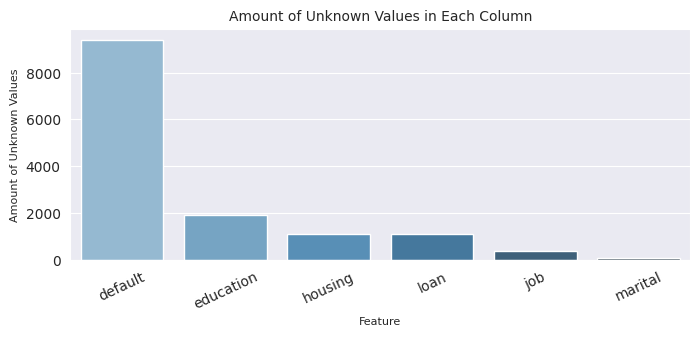

With the exception of the default category, there are 4548 unique records with unknown values, which is 10.04% of the total unique records.
See more considerations i.e. the default category in the Exploratory Data Analysis: Summary section.


In [3]:
### Investigating the amount of unknown values in each feature

unknowns = df.isin(['unknown']).sum()
unknowns = unknowns[unknowns > 0]
unknowns = unknowns.sort_values(ascending=False)

plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
sns.barplot(x=unknowns.index, y=unknowns.values, palette='Blues_d')
plt.xticks(rotation=25)
plt.title('Amount of Unknown Values in Each Column', fontsize=10)
plt.xlabel('Feature', fontsize=8)
plt.ylabel('Amount of Unknown Values', fontsize=8)
plt.show()

### Printing out the number and percentage of unique records that have unknown values, excluding 'default'

unknowns = unknowns.drop('default')
print('With the exception of the default category, there are {} unique records with unknown values, which is {}% of the total unique records.'.format(unknowns.sum(), round(unknowns.sum() / df.shape[0] * 100, 2)))
print('See more considerations i.e. the default category in the Exploratory Data Analysis: Summary section.')

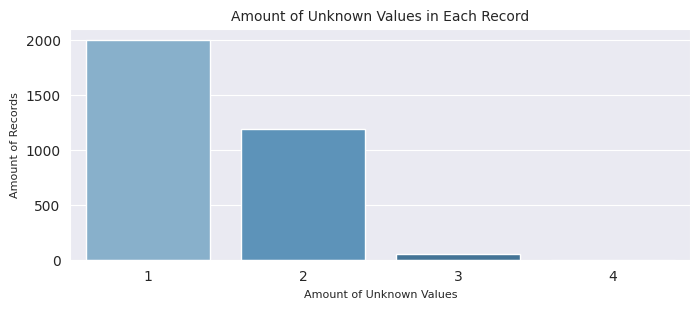

In [4]:
### Visualizing counts of how many unknown values are in each record, excluding zero unknown values and the default feature

df_null_counts = df.copy().drop('default', axis=1)
unknowns = df_null_counts.isin(['unknown']).sum(axis=1)
unknowns = unknowns[unknowns > 0]
unknowns = unknowns.value_counts()

plt.figure(figsize=(8, 3))
sns.set_style('darkgrid')
sns.barplot(x=unknowns.index, y=unknowns.values, palette='Blues_d')
plt.title('Amount of Unknown Values in Each Record', fontsize=10)
plt.xlabel('Amount of Unknown Values', fontsize=8)
plt.ylabel('Amount of Records', fontsize=8)
plt.show()

##### <ins>*Categorical Features*</ins>

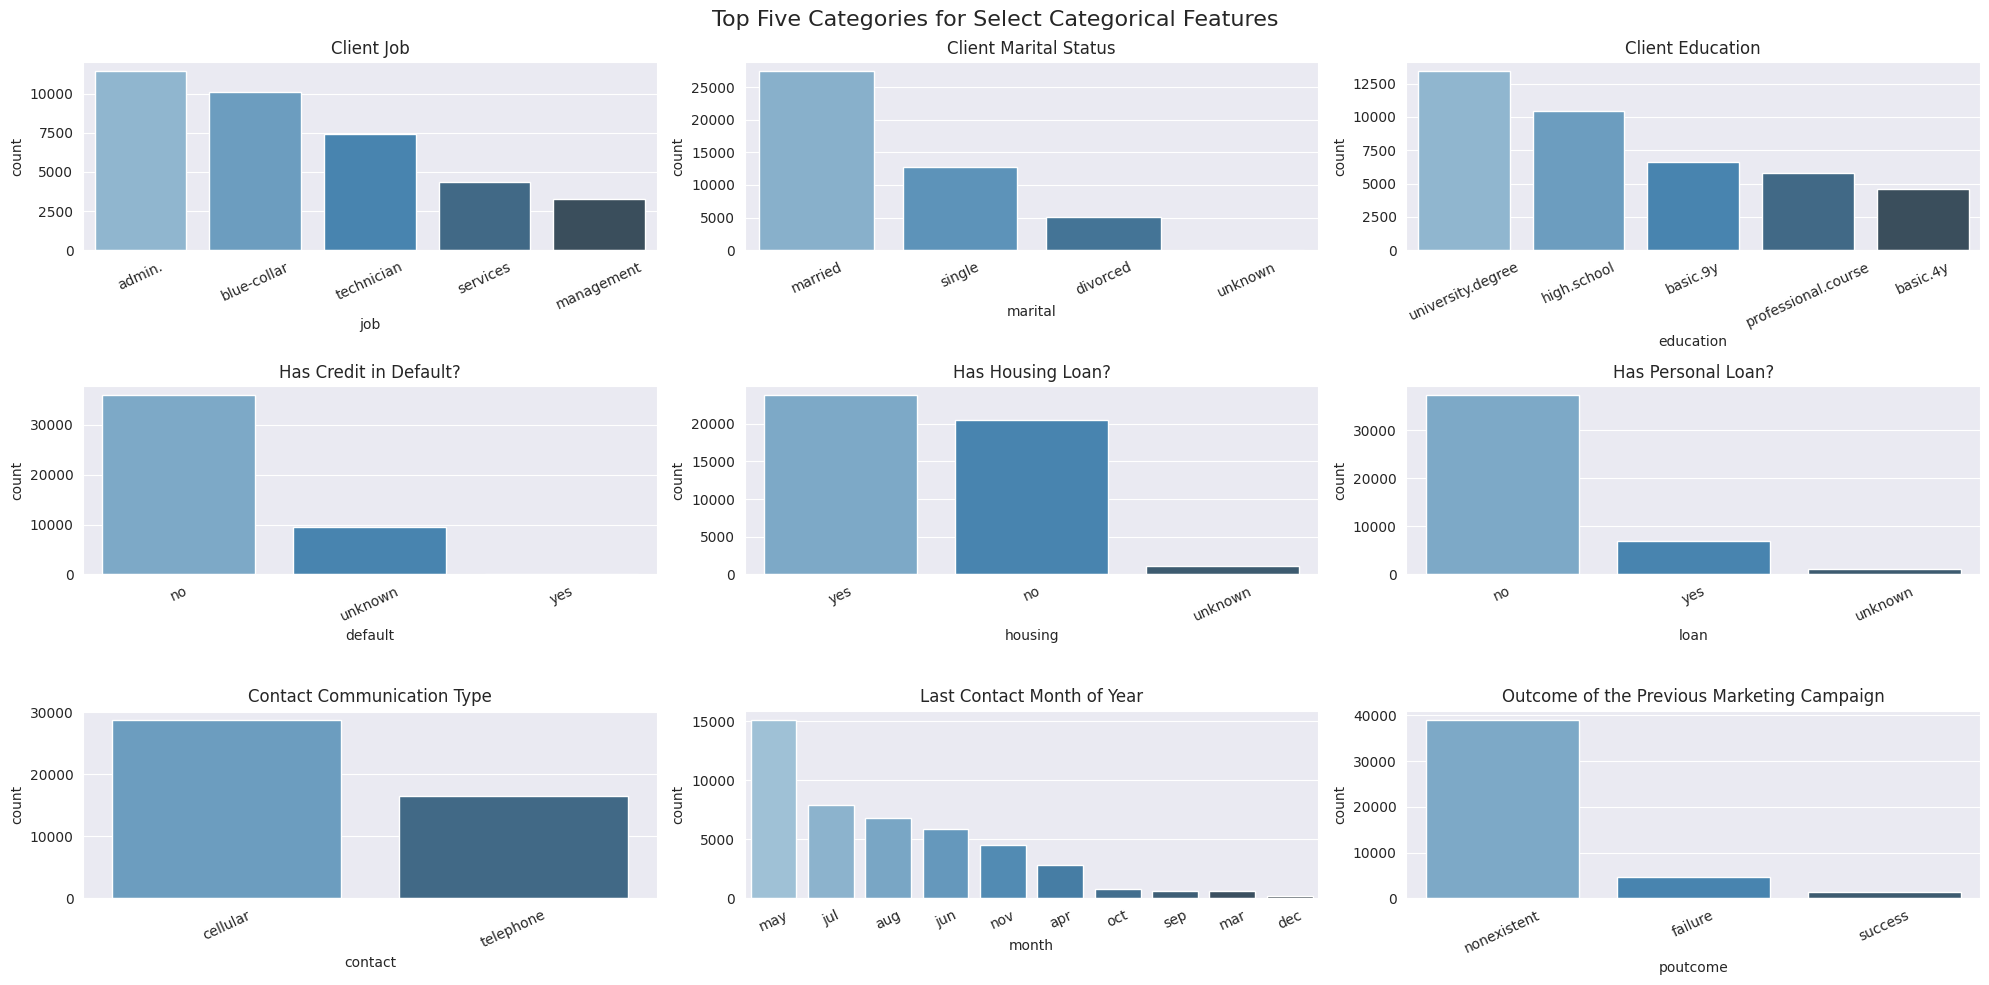

In [5]:
### Visualing the top five categories for key categorical features

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Top Five Categories for Select Categorical Features', fontsize=16)
sns.countplot(x='job', data=df, ax=ax[0, 0], palette='Blues_d', order=df['job'].value_counts().iloc[:5].index, )
sns.countplot(x='marital', data=df, ax=ax[0, 1], palette='Blues_d', order=df['marital'].value_counts().iloc[:5].index)
sns.countplot(x='education', data=df, ax=ax[0, 2], palette='Blues_d', order=df['education'].value_counts().iloc[:5].index)
sns.countplot(x='default', data=df, ax=ax[1, 0], palette='Blues_d', order=df['default'].value_counts().iloc[:5].index)
sns.countplot(x='housing', data=df, ax=ax[1, 1], palette='Blues_d', order=df['housing'].value_counts().iloc[:5].index)
sns.countplot(x='loan', data=df, ax=ax[1, 2], palette='Blues_d', order=df['loan'].value_counts().iloc[:5].index)
sns.countplot(x='contact', data=df, ax=ax[2, 0], palette='Blues_d', order=df['contact'].value_counts().iloc[:5].index)
sns.countplot(x='month', data=df, ax=ax[2, 1], palette='Blues_d', order=df['month'].value_counts().index)
sns.countplot(x='poutcome', data=df, ax=ax[2, 2], palette='Blues_d', order=df['poutcome'].value_counts().iloc[:5].index)
ax[0, 0].set_title('Client Job', fontsize=12)
ax[0, 1].set_title('Client Marital Status', fontsize=12)
ax[0, 2].set_title('Client Education', fontsize=12)
ax[1, 0].set_title('Has Credit in Default?', fontsize=12)
ax[1, 1].set_title('Has Housing Loan?', fontsize=12)
ax[1, 2].set_title('Has Personal Loan?', fontsize=12)
ax[2, 0].set_title('Contact Communication Type', fontsize=12)
ax[2, 1].set_title('Last Contact Month of Year', fontsize=12)
ax[2, 2].set_title('Outcome of the Previous Marketing Campaign', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

##### <ins>*Numerical Features*</ins>

Number of unique outliers removed from age: 459
Number of unique outliers removed from duration: 454
Number of unique outliers removed from campaign: 516
Number of unique outliers removed from pdays: 43655


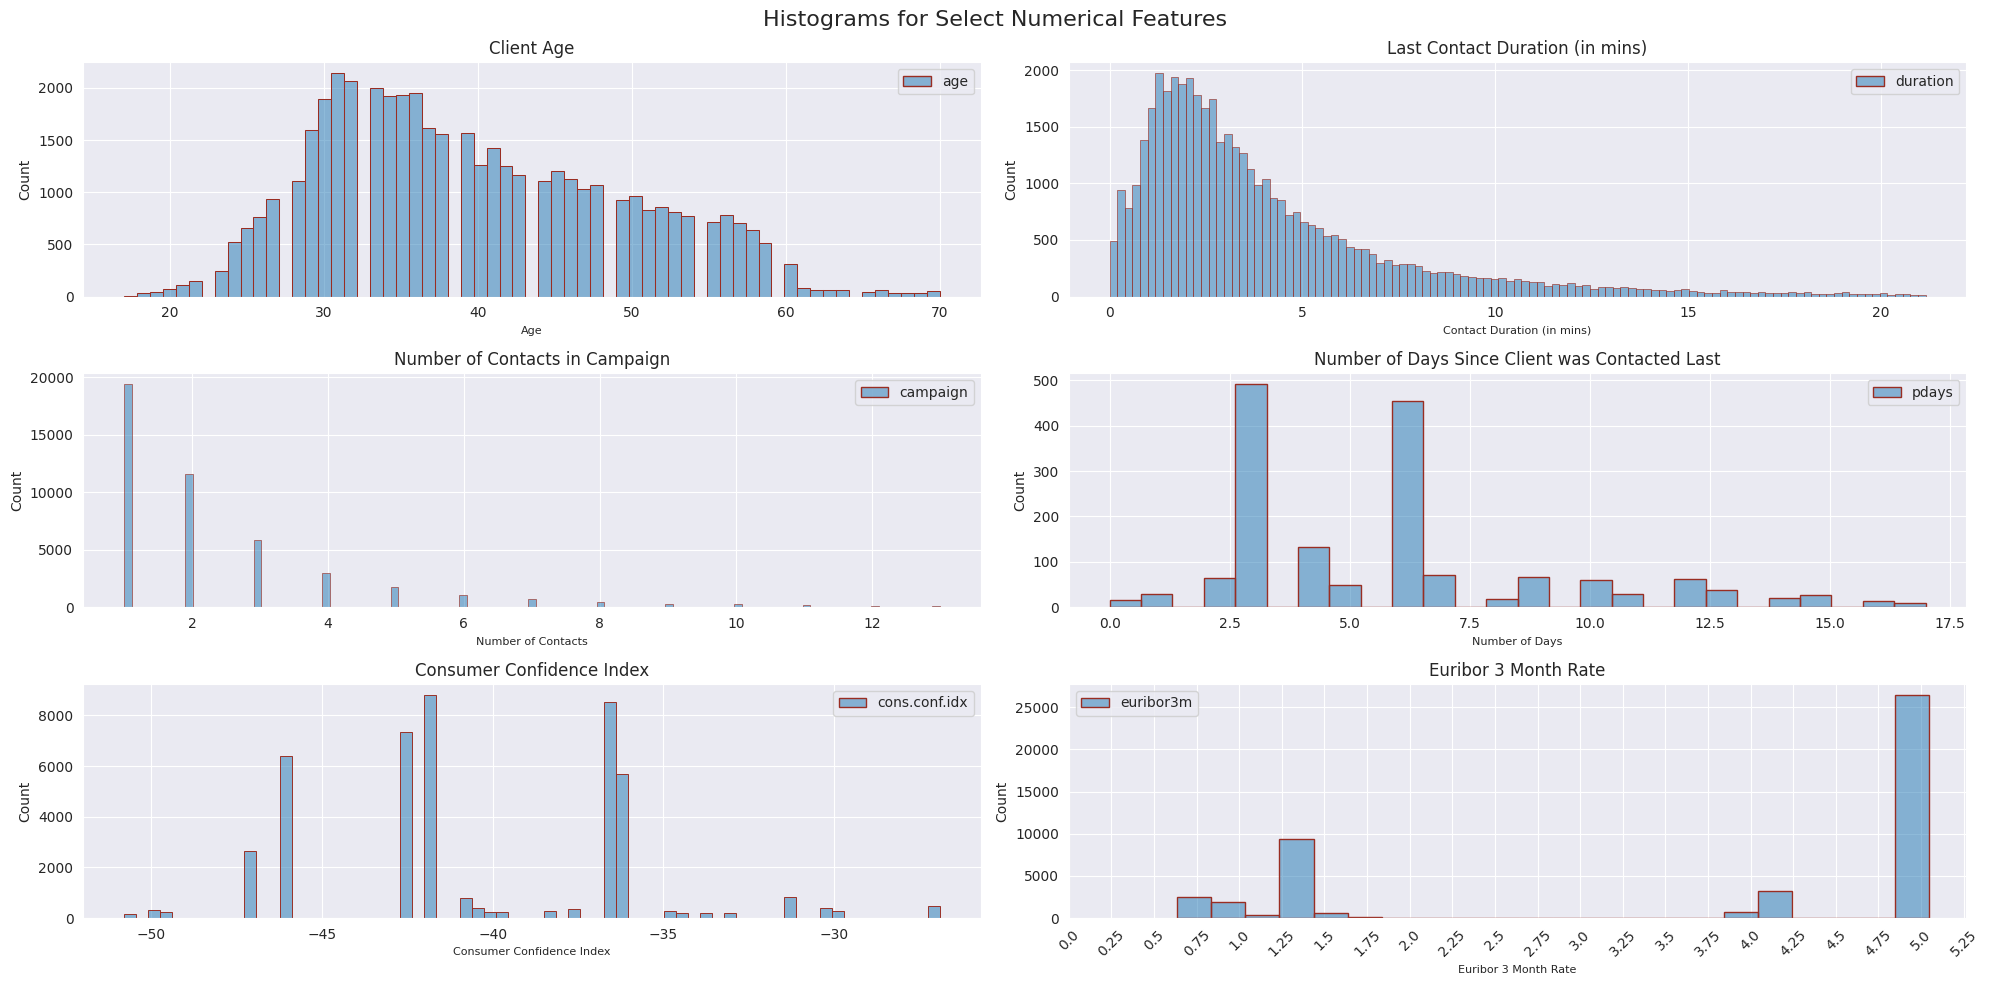

In [6]:
### Making a copy of the dataframe and removing 999's from the pdays column for visualization purposes (as this is meant to be a null value per the dataset documentation)

df_copy = df.copy()
df_copy['pdays'] = df_copy['pdays'].replace(999, np.nan)

### Creating a new dataframe for each numerical feature and removing outliers

age_df = df_copy[['age']]
duration_df = df_copy[['duration']] / 60
campaign_df = df_copy[['campaign']]
pdays_df = df_copy[['pdays']]
con_conf_df = df_copy[['cons.conf.idx']]
euribor3m_df = df_copy[['euribor3m']]
age_df = age_df[age_df['age'] < age_df['age'].quantile(0.99)]
duration_df = duration_df[duration_df['duration'] < duration_df['duration'].quantile(0.99)]
campaign_df = campaign_df[campaign_df['campaign'] < campaign_df['campaign'].quantile(0.99)]
pdays_df = pdays_df[pdays_df['pdays'] < pdays_df['pdays'].quantile(0.99)]


### Printing out the number of unique records that have been removed

print('Number of unique outliers removed from age: {}'.format(df_copy.shape[0] - age_df.shape[0]))
print('Number of unique outliers removed from duration: {}'.format(df_copy.shape[0] - duration_df.shape[0]))
print('Number of unique outliers removed from campaign: {}'.format(df_copy.shape[0] - campaign_df.shape[0]))
print('Number of unique outliers removed from pdays: {}'.format(df_copy.shape[0] - pdays_df.shape[0]))

### Creating histograms for each numerical feature and labeling each x axis, and making the euromibor3m x axis more detailed

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Histograms for Select Numerical Features', fontsize=16)
sns.histplot(age_df, ax=ax[0, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(duration_df, ax=ax[0, 1], color='#e74c3c', edgecolor='#992d22')
sns.histplot(campaign_df, ax=ax[1, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(pdays_df, ax=ax[1, 1], color='#e74c3c', edgecolor='#992d22')
sns.histplot(con_conf_df, ax=ax[2, 0], color='#e74c3c', edgecolor='#992d22')
sns.histplot(euribor3m_df, ax=ax[2, 1], color='#e74c3c', edgecolor='#992d22')
ax[0, 0].set_xlabel('Age', fontsize=8)
ax[0, 1].set_xlabel('Contact Duration (in mins)', fontsize=8)
ax[1, 0].set_xlabel('Number of Contacts', fontsize=8)
ax[1, 1].set_xlabel('Number of Days', fontsize=8)
ax[2, 0].set_xlabel('Consumer Confidence Index', fontsize=8)
ax[2, 1].set_xlabel('Euribor 3 Month Rate', fontsize=8)
ax[0, 0].set_title('Client Age', fontsize=12)
ax[0, 1].set_title('Last Contact Duration (in mins)', fontsize=12)
ax[1, 0].set_title('Number of Contacts in Campaign', fontsize=12)
ax[1, 1].set_title('Number of Days Since Client was Contacted Last', fontsize=12)
ax[2, 0].set_title('Consumer Confidence Index', fontsize=12)
ax[2, 1].set_title('Euribor 3 Month Rate', fontsize=12)
ax[2, 1].set_xticks(np.arange(0, 5.5, 0.25))
ax[2, 1].set_xticklabels(np.arange(0, 5.5, 0.25), rotation=45)
plt.tight_layout()
plt.show()



<div style="text-align:center">
    <img src="Images/target.png" style="width: 30%; border-radius: 10px;"/>
</div>

<a id='Exploratory Data Analysis: Target'></a>

## **Exploratory Data Analysis: Target**

To get a baseline understanding of the target variable, we will first visualize the **distribution of the target** and then look at the **feature distribution** of records where the interaction resulted in a term deposit. We will take a look at each feature to see if there are any interesting patterns we can observe and apply to modeling

##### <ins>*Target Distribution*</ins>

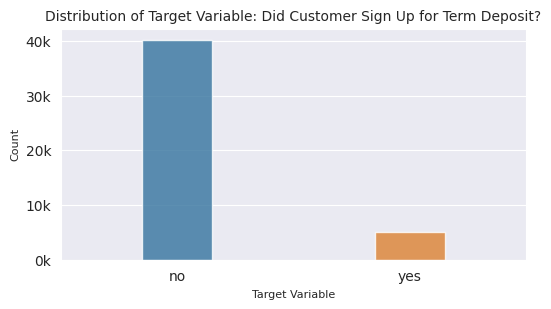

In [7]:
### Investigating the distribution of the target variable

plt.figure(figsize=(6, 3))
sns.set_style('darkgrid')
sns.countplot(x='y', data=df, saturation=0.7, alpha=0.8, width=0.3)
plt.title('Distribution of Target Variable: Did Customer Sign Up for Term Deposit?', fontsize=10)
plt.xlabel('Target Variable', fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.yticks(np.arange(0, 45000, 10000), ['0k', '10k', '20k', '30k', '40k'])
plt.show()


##### <ins>*Categorical and Numeric Feature Distributions of 'yes' targets*</ins>

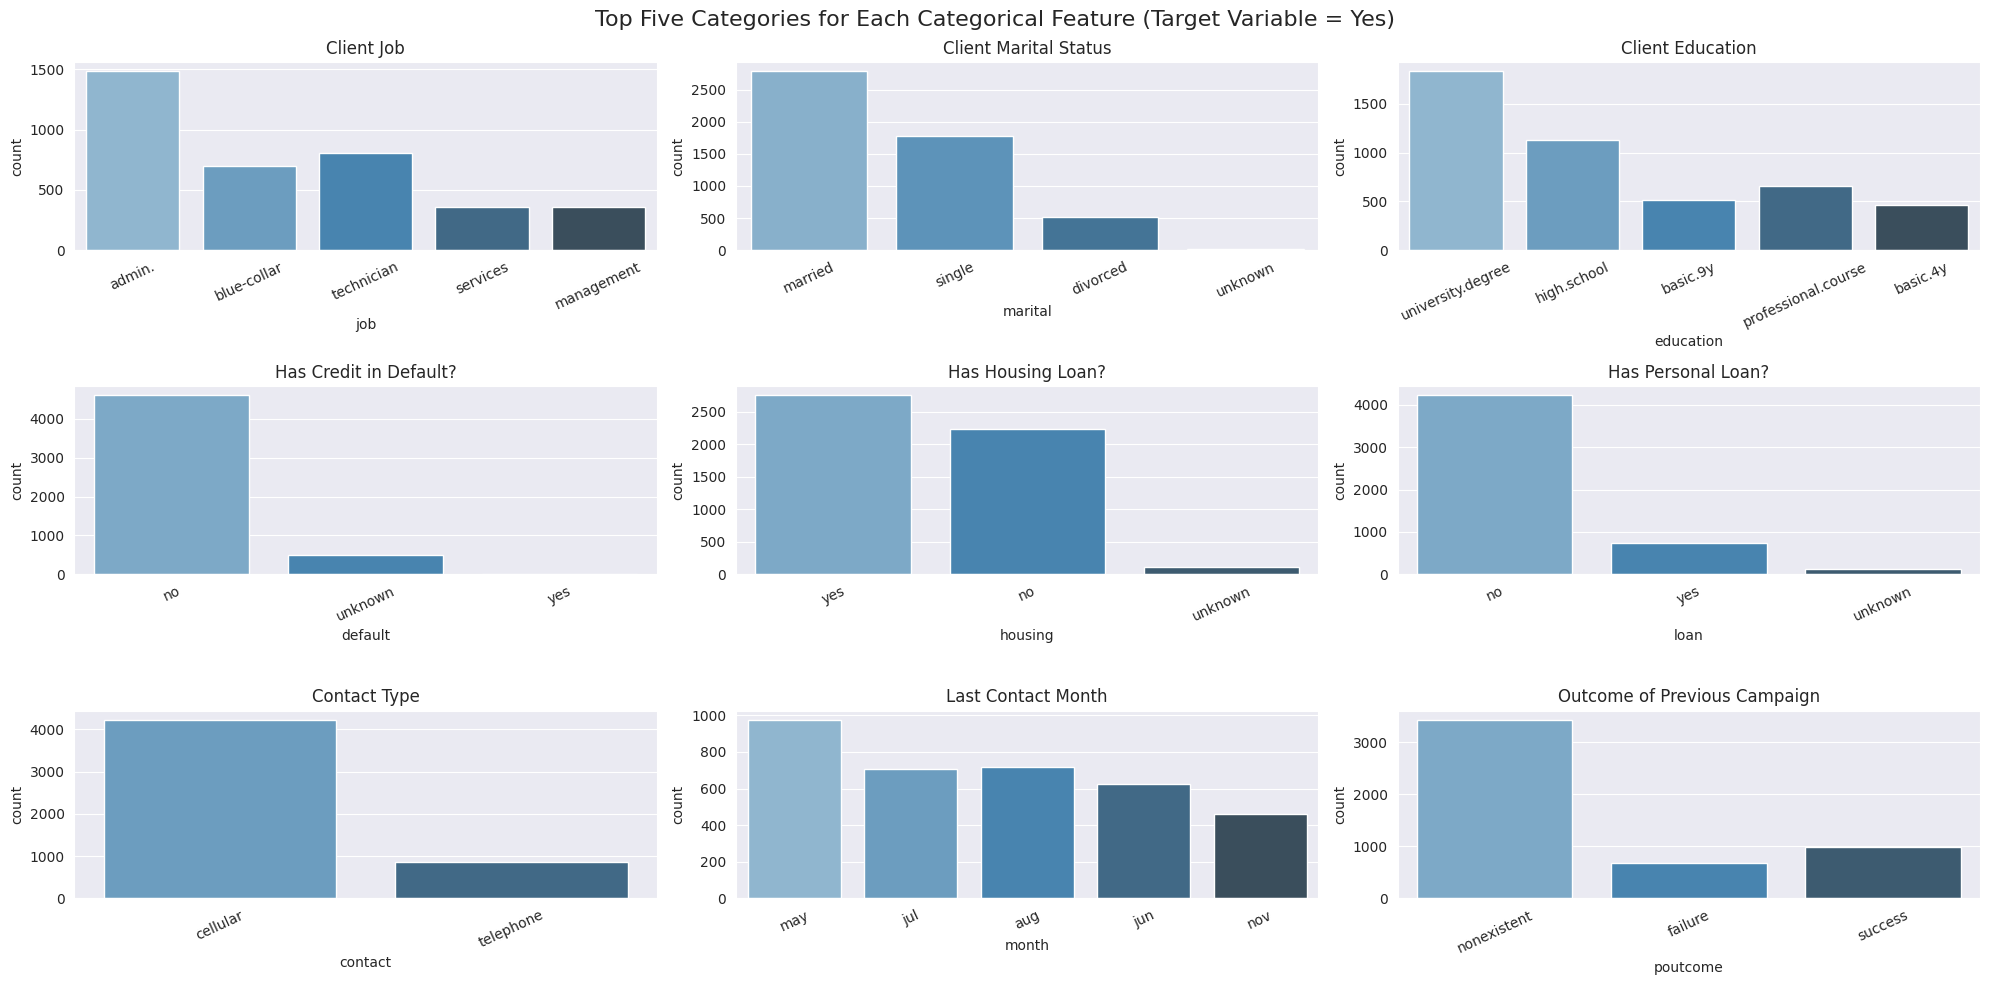

Number of unique outliers removed from age: 55
Number of unique outliers removed from duration: 51
Number of unique outliers removed from campaign: 59
Number of unique outliers removed from pdays: 4039


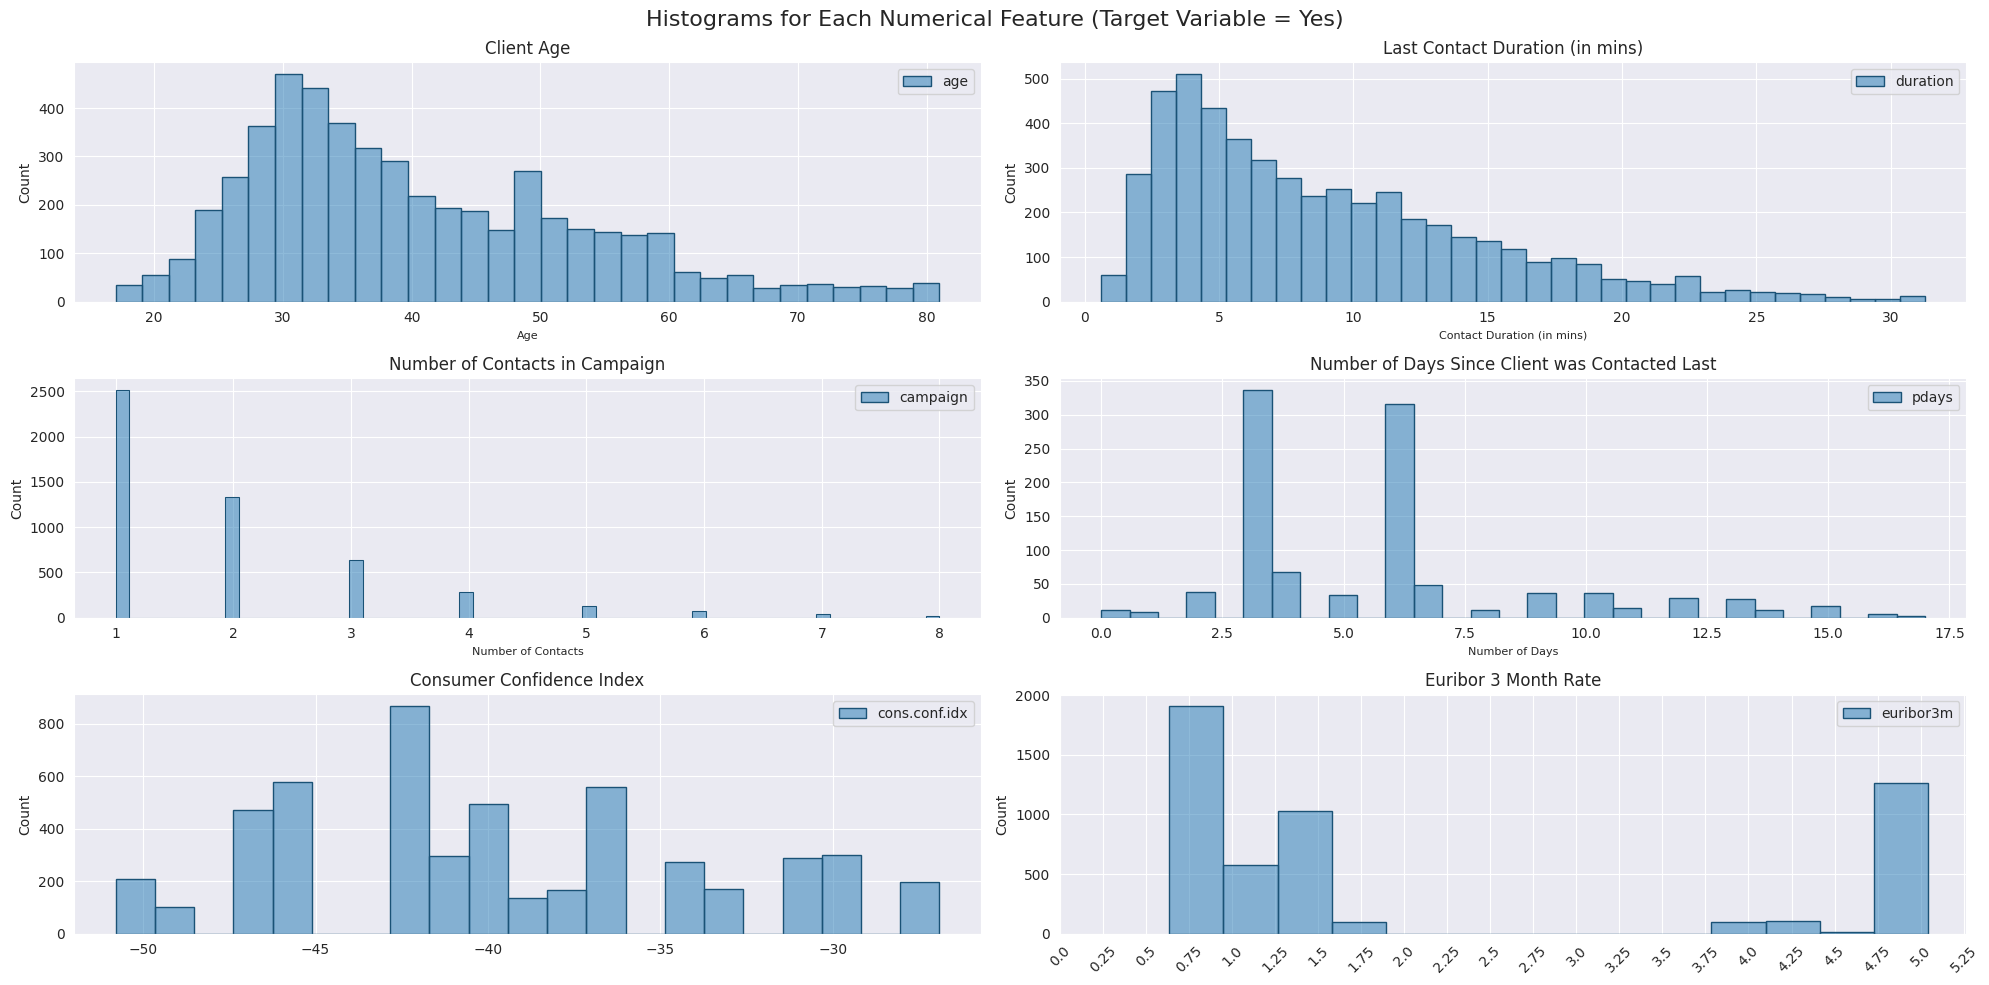

In [8]:
### Making the same categorical and numerical visualizations as above, but this time only for the target variable = 'yes'

fig, ax = plt.subplots(3, 3, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Top Five Categories for Each Categorical Feature (Target Variable = Yes)', fontsize=16)
sns.countplot(x='job', data=df[df['y'] == 'yes'], ax=ax[0, 0], palette='Blues_d', order=df['job'].value_counts().iloc[:5].index, )
sns.countplot(x='marital', data=df[df['y'] == 'yes'], ax=ax[0, 1], palette='Blues_d', order=df['marital'].value_counts().iloc[:5].index)
sns.countplot(x='education', data=df[df['y'] == 'yes'], ax=ax[0, 2], palette='Blues_d', order=df['education'].value_counts().iloc[:5].index)
sns.countplot(x='default', data=df[df['y'] == 'yes'], ax=ax[1, 0], palette='Blues_d', order=df['default'].value_counts().iloc[:5].index)
sns.countplot(x='housing', data=df[df['y'] == 'yes'], ax=ax[1, 1], palette='Blues_d', order=df['housing'].value_counts().iloc[:5].index)
sns.countplot(x='loan', data=df[df['y'] == 'yes'], ax=ax[1, 2], palette='Blues_d', order=df['loan'].value_counts().iloc[:5].index)
sns.countplot(x='contact', data=df[df['y'] == 'yes'], ax=ax[2, 0], palette='Blues_d', order=df['contact'].value_counts().iloc[:5].index)
sns.countplot(x='month', data=df[df['y'] == 'yes'], ax=ax[2, 1], palette='Blues_d', order=df['month'].value_counts().iloc[:5].index)
sns.countplot(x='poutcome', data=df[df['y'] == 'yes'], ax=ax[2, 2], palette='Blues_d', order=df['poutcome'].value_counts().iloc[:5].index)
ax[0, 0].set_title('Client Job', fontsize=12)
ax[0, 1].set_title('Client Marital Status', fontsize=12)
ax[0, 2].set_title('Client Education', fontsize=12)
ax[1, 0].set_title('Has Credit in Default?', fontsize=12)
ax[1, 1].set_title('Has Housing Loan?', fontsize=12)
ax[1, 2].set_title('Has Personal Loan?', fontsize=12)
ax[2, 0].set_title('Contact Type', fontsize=12)
ax[2, 1].set_title('Last Contact Month', fontsize=12)
ax[2, 2].set_title('Outcome of Previous Campaign', fontsize=12)

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=25)

plt.tight_layout()
plt.show()

### Creating a new dataframe for each numerical feature and removing outliers, but this time only for the target variable = 'yes'

age_df = df_copy[df_copy['y'] == 'yes'][['age']]
duration_df = df_copy[df_copy['y'] == 'yes'][['duration']] / 60
campaign_df = df_copy[df_copy['y'] == 'yes'][['campaign']]
pdays_df = df_copy[df_copy['y'] == 'yes'][['pdays']]
cons_conf_idx_df = df_copy[df_copy['y'] == 'yes'][['cons.conf.idx']]
euribor_3m_df = df_copy[df_copy['y'] == 'yes'][['euribor3m']]
age_df = age_df[age_df['age'] < age_df['age'].quantile(0.99)]
duration_df = duration_df[duration_df['duration'] < duration_df['duration'].quantile(0.99)]
campaign_df = campaign_df[campaign_df['campaign'] < campaign_df['campaign'].quantile(0.99)]
pdays_df = pdays_df[pdays_df['pdays'] < pdays_df['pdays'].quantile(0.99)]

### Printing out the number of unique records that have been removed, but this time only for the target variable = 'yes'

print('Number of unique outliers removed from age: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - age_df.shape[0]))
print('Number of unique outliers removed from duration: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - duration_df.shape[0]))
print('Number of unique outliers removed from campaign: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - campaign_df.shape[0]))
print('Number of unique outliers removed from pdays: {}'.format(df_copy[df_copy['y'] == 'yes'].shape[0] - pdays_df.shape[0]))

### Creating histograms for each numerical feature, but this time only for the target variable = 'yes'

fig, ax = plt.subplots(3, 2, figsize=(20, 10))
sns.set_style('darkgrid')
fig.suptitle('Histograms for Each Numerical Feature (Target Variable = Yes)', fontsize=16)
sns.histplot(age_df, ax=ax[0, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(duration_df, ax=ax[0, 1], color='#3498db', edgecolor='#1a5276')
sns.histplot(campaign_df, ax=ax[1, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(pdays_df, ax=ax[1, 1], color='#3498db', edgecolor='#1a5276')
sns.histplot(cons_conf_idx_df, ax=ax[2, 0], color='#3498db', edgecolor='#1a5276')
sns.histplot(euribor_3m_df, ax=ax[2, 1], color='#3498db', edgecolor='#1a5276')
ax[0, 0].set_xlabel('Age', fontsize=8)
ax[0, 1].set_xlabel('Contact Duration (in mins)', fontsize=8)
ax[1, 0].set_xlabel('Number of Contacts', fontsize=8)
ax[1, 1].set_xlabel('Number of Days', fontsize=8)
ax[0, 0].set_title('Client Age', fontsize=12)
ax[0, 1].set_title('Last Contact Duration (in mins)', fontsize=12)
ax[1, 0].set_title('Number of Contacts in Campaign', fontsize=12)
ax[1, 1].set_title('Number of Days Since Client was Contacted Last', fontsize=12)
ax[2, 0].set_title('Consumer Confidence Index', fontsize=12)
ax[2, 1].set_title('Euribor 3 Month Rate', fontsize=12)
ax[2, 1].set_xticks(np.arange(0, 5.5, 0.25))
ax[2, 1].set_xticklabels(np.arange(0, 5.5, 0.25), rotation=45)
plt.tight_layout()
plt.show()


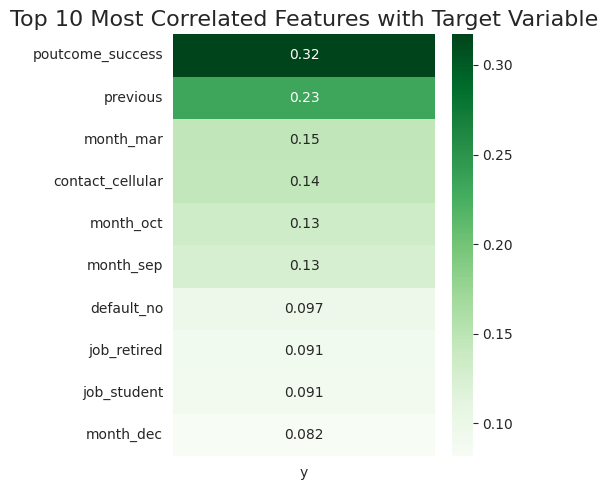

In [9]:
### Making a copy of the original dataframe that drops the 'duration' feature, making the target binary, and one-hot encoding the categorical features

df_copy_ohe = df.copy().drop('duration', axis=1)
df_copy_ohe['y'] = df_copy_ohe['y'].map({'yes': 1, 'no': 0})
df_copy_ohe = pd.get_dummies(df_copy_ohe, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'])

### Finding the correlation between each feature and the target variable and visualizing the top 10 most correlated features in a sns heatmap

corr = df_copy_ohe.corr()
corr = corr.sort_values(by='y', ascending=False)
corr = corr[['y']]
corr = corr.iloc[1:11]
plt.figure(figsize=(5, 5))
sns.heatmap(corr, annot=True, cmap='Greens')
plt.title('Top 10 Most Correlated Features with Target Variable', fontsize=16)
plt.tight_layout()
plt.show()


<a id='exploratory-data-analysis-summary'></a>

## **Exploratory Data Analysis: Summary**

In summary, we found the following insights as a result of our exploratory data analysis:

##### <ins>*High Level Data Findings*</ins>

- The dataset has features which can broadly be categorized as:

    - Client data *(such as age, job, marital status, etc.)*
    - Campaign data *(such as number of contacts, days since last contact, etc.)*, and
    - External data *(such as consumer price index, employment variation rate, etc.)*
<br>
</br>
- Most of the data is categorical, with only 10% of the columns being numerical

- The dataset is mostly complete, with only 10% of records having missing data excluding the default category. Of that 10%, half have one missing field and most others have two. Records missing more than two fields are rare

    - Note: the 'default' feature is considered seperate from the other features when evaluating missing data because this category likely extends to if the customer has defaulted credit **anywhere**, not just with the bank running the campaign. This is likely a very sensative topic and the call center agents may not have been advised to ask about it. This is likely why the default category contains by far the most 'unknown' values

##### <ins>*Feature Findings*</ins>

- The average age is around 30, with the majority of customers being between 30 and 40 years old
<br>
</br>
- The majority of customers are highly educated and have families
<br>
</br>
- The the job feature is very vague, with most customers having an 'admin' or 'blue collar' job
<br>
</br>
- The majority of customers have not been contacted before, and the majority of customers have been contacted less than 5 times
<br>
</br>
- The majority of customers have not been contacted in the last 3 months, and the majority of customers have been contacted less than 10 days ago

##### <ins>*Target Variable Findings*</ins>

- The target variable is imbalanced, with only 11% of customers subscribing to a term deposit
<br>
</br>
- Customers who subscribe to a term deposit are generally older, have higher education, and have higher incomes
<br>
</br>
- Customers who subscribe to a term deposit are generally contacted more frequently, and have been contacted more recently
<br>
</br>
- Customers who have subscribed to a term deposit in the past are more likely to subscribe again as indicated by the correlation between the 'poutcome' and 'y' features
<br>
</br>
- An interesting finding is that EURIBOR 3 month rate trends lower for customers who subscribe to a term deposit. We would expect the opposite, as a lower rate would mean a lower return on investment for the bank. This could be due to the fact that the bank is offering a higher rate to customers who subscribe to a term deposit, or it could be due to the fact that the bank is offering a lower rate to customers who do not subscribe to a term deposit. This is something to keep in mind when modeling

<a id='Data Preprocessing'></a>

## **Data Preprocessing**

In order to prepare the data for modeling, we will perform the following steps:

##### <ins>*Before the train / test split*</ins>

1. *Cast object data types as the category data type and ordinate the categories where applicable*
    - We will cast the object data types as the category data type to save memory and improve performance
    - We will ordinate the categories where applicable
        - For example, we will ordinate the 'education' feature from least to most education
<br>
</br>
2. *Drop features*
    - We will drop the 'duration' feature because it is not known before a call is performed
    - We will drop the 'default' feature because it is contains many missing values and is not heavily correlated with the target variable

##### <ins>*Train / test split*</ins>

3. *Split data into train and test sets*
    - We will split the data into train and test sets using an 80/20 split

##### <ins>*After the train / test split*</ins>

4. *Perform SMOTE oversampling on the train set*
    - We will perform SMOTE oversampling on the train set to balance the target variable
<br>
</br>
5. *Encode categorical features*
    - We will encode the categorical features using a one-hot encoding function
<br>
</br>
6. *Scale numerical features*
    - We will scale the numerical features using the standard scaler

##### <ins>*Code - Before the train / test split*</ins>

In [10]:
### Making functions that handle the categorical features in the data set

columns_to_categorize = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

def cast_as_columns(df):
    for column in columns_to_categorize:
        df[column] = df[column].astype('category')
    return df

def ordinal_encode_education(df):
    df['education'] = df['education'].cat.reorder_categories(['unknown', 'illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 
                                                              'high.school', 'professional.course', 'university.degree'])
    df['education'] = df['education'].cat.codes
    return df

def encode_target(df):
    df['y'] = df['y'].cat.codes
    return df

### Making a function that drops the 'duration' and 'default' features from the dataframe

def drop_features(df):
    df = df.drop(['duration', 'default'], axis=1)
    return df

### Writing a function that combines the above functions

def clean_data(df):
    df = cast_as_columns(df)
    df = ordinal_encode_education(df)
    df = drop_features(df)
    df = encode_target(df)
    return df

### Making a copy of the original dataframe and cleaning it

df_clean = df.copy()
df_clean = clean_data(df_clean)

##### <ins>*Code - The train / test split*</ins>

In [11]:
### Performing a train-test split on the cleaned dataframe and casting as pandas dataframes

from sklearn.model_selection import train_test_split

X = df_clean.drop('y', axis=1)
y = df_clean['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=312)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)
y_train = pd.DataFrame(y_train, columns=['y'])
y_test = pd.DataFrame(y_test, columns=['y'])

##### <ins>*Code - After train / test split*</ins>

In [12]:
### Writing a function that performs a one hot encodes the categorical features X_train and X_test and drops the original categorical features

def one_hot_encode(X_train, X_test):
    for column in X_train.columns:
        if X_train[column].dtype == 'category':
            X_train = pd.get_dummies(X_train, columns=[column], prefix=column)
            X_test = pd.get_dummies(X_test, columns=[column], prefix=column)
    return X_train, X_test

### Writing a function that performs a standard scaler on the numerical features X_train and X_test

from sklearn.preprocessing import StandardScaler

def standard_scale(X_train, X_test):
    for column in X_train.columns:
        if X_train[column].dtype != 'category':
            scaler = StandardScaler()
            X_train[column] = scaler.fit_transform(X_train[column].values.reshape(-1, 1))
            X_test[column] = scaler.transform(X_test[column].values.reshape(-1, 1))
    return X_train, X_test

### Writing a function that SMOTES the training data

from imblearn.over_sampling import SMOTE

def smote(X_train, y_train):
    sm = SMOTE(random_state=312)
    X_train, y_train = sm.fit_resample(X_train, y_train)
    return X_train, y_train

### Writing a function that combines the above functions

def preprocess_data(X_train, X_test, y_train, y_test):
    X_train, X_test = one_hot_encode(X_train, X_test)
    X_train, X_test = standard_scale(X_train, X_test)
    X_train, y_train = smote(X_train, y_train)
    return X_train, X_test, y_train, y_test

In [13]:
### Preprocessing the data

X_train_processed, X_test_processed, y_train_processed, y_test_processed = preprocess_data(X_train, X_test, y_train, y_test)

<a id='scoring-functions-and-baseline-model'></a>

## **Scoring Functions and Baseline Model**

Now that we have prepared the data, we will define a few scoring functions to evaluate our models and make a baseline model to compare our other models to. 

Our primary metric for evaluating our models will be **recall**, as we want to minimize the number of customers who would subscribe to a term deposit that we do not contact. 

We will use accuracy, precision, f1 score, and AUC as secondary metrics to evaluate our models to make sure we are not overfitting to the recall metric causing the other metrics to suffer

In [14]:
### Writing a function that will score each model and print side by side seaborn confusion matrices

from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    ### Fitting the model and making predictions
    
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    ### Printing the training, cross validation, and test results

    print('------------TRAINING RESULTS--------------')
    print()
    print('Train AUC: {}'.format(roc_auc_score(y_train, y_train_pred)))
    print('Train Accuracy: {}'.format(accuracy_score(y_train, y_train_pred)))
    print('Train Precision: {}'.format(precision_score(y_train, y_train_pred)))
    print('Train Recall: {}'.format(recall_score(y_train, y_train_pred)))
    print('Train F1: {}'.format(f1_score(y_train, y_train_pred)))
    print()
    print('------------CROSS VALIDATION--------------')
    print()
    print('Cross Validation AUC: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc'))))
    print('Cross Validation Accuracy: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy'))))
    print('Cross Validation Precision: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='precision'))))
    print('Cross Validation Recall: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='recall'))))
    print('Cross Validation F1: {}'.format(np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='f1'))))
    print()
    print('------------TEST RESULTS------------------')
    print()
    print('Test AUC: {}'.format(roc_auc_score(y_test, y_test_pred)))
    print('Test Accuracy: {}'.format(accuracy_score(y_test, y_test_pred)))
    print('Test Precision: {}'.format(precision_score(y_test, y_test_pred)))
    print('Test Recall: {}'.format(recall_score(y_test, y_test_pred)))
    print('Test F1: {}'.format(f1_score(y_test, y_test_pred)))

    ### Plotting the confusion matrices and adding lines to separate the matrices

    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt='g', ax=ax[0], cmap='Blues')
    ax[0].set_title('Training Confusion Matrix')
    ax[0].set_xlabel('Predicted')
    ax[0].set_ylabel('Actual')
    sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='g', ax=ax[1], cmap='Blues')
    ax[1].set_title('Test Confusion Matrix')
    ax[1].set_xlabel('Predicted')
    ax[1].set_ylabel('Actual')
    plt.show()
    
    ### Printing the five most important features if the model has a feature_importances_ or coef_ attribute

    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
        print('Top 5 Features')
        print()
        print(feature_importances.head())
    elif hasattr(model, 'coef_'):
        feature_importances = pd.DataFrame(model.coef_[0], index=X_train.columns, columns=['importance']).sort_values('importance', ascending=False)
        print('Top 5 Features')
        print()
        print(feature_importances.head())

    

------------TRAINING RESULTS--------------

Train AUC: 0.5
Train Accuracy: 0.5
Train Precision: 0.0
Train Recall: 0.0
Train F1: 0.0

------------CROSS VALIDATION--------------

Cross Validation AUC: 0.5
Cross Validation Accuracy: 0.49998445636123423
Cross Validation Precision: 0.09999222818061708
Cross Validation Recall: 0.2
Cross Validation F1: 0.1333264248704663

------------TEST RESULTS------------------

Test AUC: 0.5
Test Accuracy: 0.8883248730964467
Test Precision: 0.0
Test Recall: 0.0
Test F1: 0.0


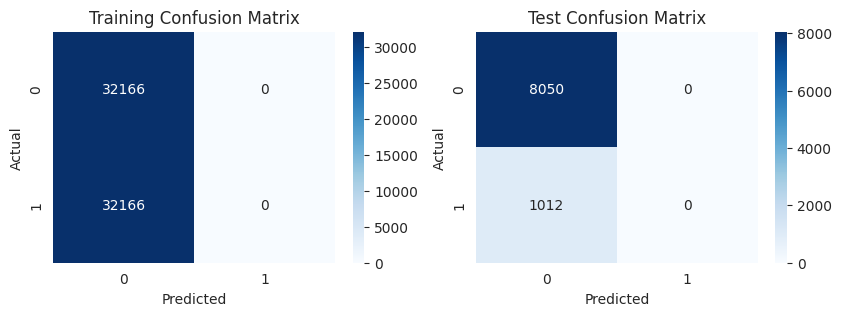

In [15]:
### Applying the training set to a dummy classifier to get a baseline accuracy score

from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train_processed, y_train_processed)

### Evaluating the dummy classifier
evaluate_model(dummy_clf, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

The dummy classifier performance will be used as a baseline model to compare our other models to. 
<br>
</br>
In practice, the dummy classifier is a classifier that makes random predictions based on the class distribution of the training set. As you can see, it simply predicts all test set interactions as zero, which is technically pretty accurate based off of the test set composition, but since our key metric is recall this is not a well performing model. As far as starter models go though, this is a good baseline model because it is a good representation of a model that does not use any machine learning. This is important because we want to make sure that our machine learning models are actually improving upon the baseline model
<br>
</br>
It is also a good baseline model because it is a good representation of a model that does not use any machine learning. This is important because we want to make sure that our machine learning models are actually improving upon the baseline model

<a id='appendix-model-iterations'></a>

## **Appendix: Modeling Iterations**

For a machine learning classifier, there are a few popular models that can be employed to solve a classification problem. These models include:

- *Logistic Regression*
- *Decision Trees*
- *Random Forests*
- *Gradient Boosting*
- *Support Vector Machines*
- *Neural Networks*

We will iterate through these models and evaluate their performance. We will also perform hyperparameter tuning on the models that we think will be the most practical and effective for deployment in a production environment and choose the best model for implementation in our application

##### <ins>*Running baseline classifiers*</ins>

Our first step will be to run a few baseline classifiers to get a sense of how well our data can be classified between obtaining a term deposit and not obtaining a term deposit. We will run the following baseline classifiers with some default parameters and common stopping criteria:

In [27]:
### Making a list of classifiers to test

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

classifiers = [
    LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', random_state=312),
    DecisionTreeClassifier(criterion='gini', max_depth=200, min_samples_split=2, random_state=312),
    RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=500, random_state=312),
    GaussianNB(var_smoothing=1.0),
    SVC(C=1.0, kernel='rbf', gamma='scale', random_state=312),
    KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    AdaBoostClassifier(n_estimators=100, learning_rate=1.0, random_state=312)]


### Making a function that evaluates each classifier in the list and visualizes the recall scores for training and test sets in a heatmap and returns the resulted_untuned in a dataframe

def evaluate_classifiers(classifiers, X_train, X_test, y_train, y_test):
        
        ### Creating a dataframe to store the resulted_untuned
        
        results_untuned = pd.DataFrame(columns=['Classifier', 'Train Recall', 'Test Recall'])

        ### Looping through each classifier and evaluating it

        for classifier in classifiers:
            classifier.fit(X_train, y_train)
            y_train_pred = classifier.predict(X_train)
            y_test_pred = classifier.predict(X_test)
            results_untuned = results_untuned.append({'Classifier': classifier.__class__.__name__,
                                      'Train Recall': recall_score(y_train, y_train_pred),
                                      'Test Recall': recall_score(y_test, y_test_pred)}, ignore_index=True)
            
        ### Plotting the resulted_untuned in a heatmap

        results_untuned = results_untuned.set_index('Classifier')
        fig, ax = plt.subplots(figsize=(10, 5))
        sns.heatmap(results_untuned, annot=True, cmap='Blues', ax=ax)
        ax.set_title('Recall Scores for Training and Test Sets')
        ax.set_xlabel('Set')
        ax.set_ylabel('Classifier')
        plt.show()

        return results_untuned

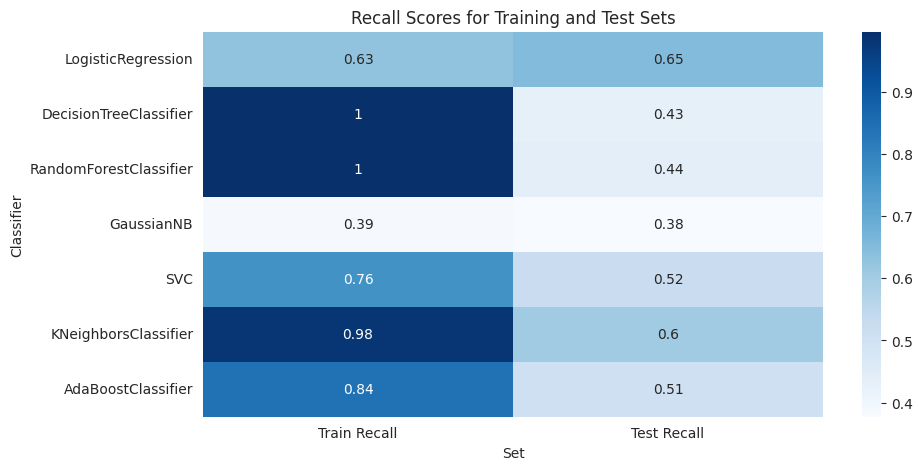

In [17]:
### Evaluating the classifiers

results_untuned = evaluate_classifiers(classifiers, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

The above models show a few things:

- There is a likelyhood that this data is not linearly separable, as the logistic regression and support vector machine models are not performing well on the training set
<br>
</br>
- The decision tree, random forest, AdaBoostClassifier and KNeighborsClassifier are performing well on the training set, but are overfitting as indicated by the large difference between the training and test scores


##### <ins>*Running Grid Searches Over Selected Models*</ins>

It may be worthwhile to run a grid search over the selected models to see if we can improve the performance. However, we will only do this for the models that are not performing well on the training set, as grid searching can quickly overfit the model to the training set. The decision tree, random forest, and KNeighborsClassifier models are already very overfit to the training set as indicated by the large difference between the training and test scores.

In [28]:
### Running a grid search to find the best parameters for the best performing classifiers for the Logistic Regression, AdaBoost, and KNN classifiers

from sklearn.model_selection import GridSearchCV

In [ ]:
### Writing a gridsearch for the Logistic Regression classifier

logreg_params = {'penalty': ['l1', 'l2'],
                    'C': [0.1, 1.0, 2.0, 7.0],
                    'solver': ['liblinear', 'lbfgs']}
logreg_gridsearch = GridSearchCV(LogisticRegression(random_state=312), logreg_params, cv=5, scoring='recall', n_jobs=-1)
logreg_gridsearch.fit(X_train_processed, y_train_processed)
print('Best Parameters for Logistic Regression: {}'.format(logreg_gridsearch.best_params_))

In [21]:
### Writing a grid search for the AdaBoost classifier, optimizing for recall

abc = AdaBoostClassifier()
abc_params = {'n_estimators': [100, 300, 500, 600, 700],
                'learning_rate': [0.1, 1.0, 10.0]}
abc_grid = GridSearchCV(abc, abc_params, cv=5, scoring='recall')
abc_grid.fit(X_train_processed, y_train_processed)
print('Best Parameters for AdaBoost: {}'.format(abc_grid.best_params_))

## Best Parameters for AdaBoost: {'learning_rate': 1.0, 'n_estimators': 500}

In [22]:
### Writing a grid search for the KNN classifier, optimizing for recall

knn = KNeighborsClassifier()
knn_params = {'n_neighbors': [3, 5, 7, 9],
                'weights': ['uniform', 'distance']}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='recall')
knn_grid.fit(X_train_processed, y_train_processed)
print('Best Parameters for KNN: {}'.format(knn_grid.best_params_))

##### <ins>*Applying ideal hyper parameters and comparing results*</ins>

With ideal hyper parameters obtained from our grid search, we will recreate our list of estimators and evaluate the improvement between the default parameters and the tuned parameters

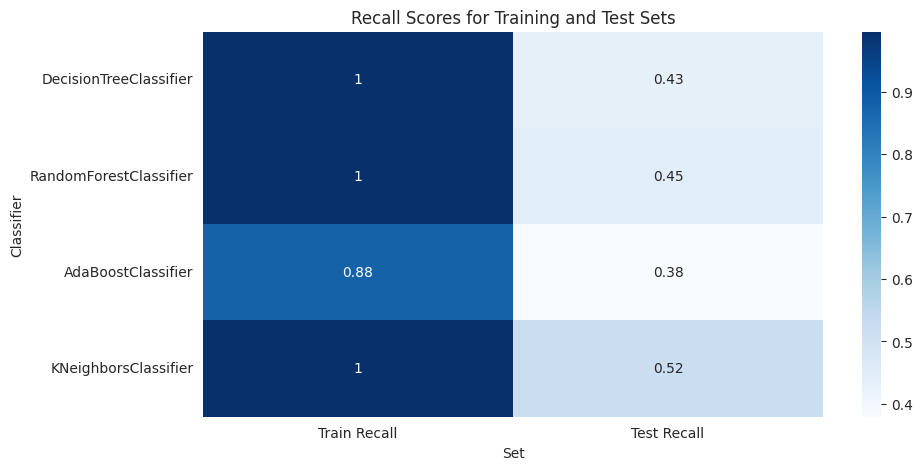

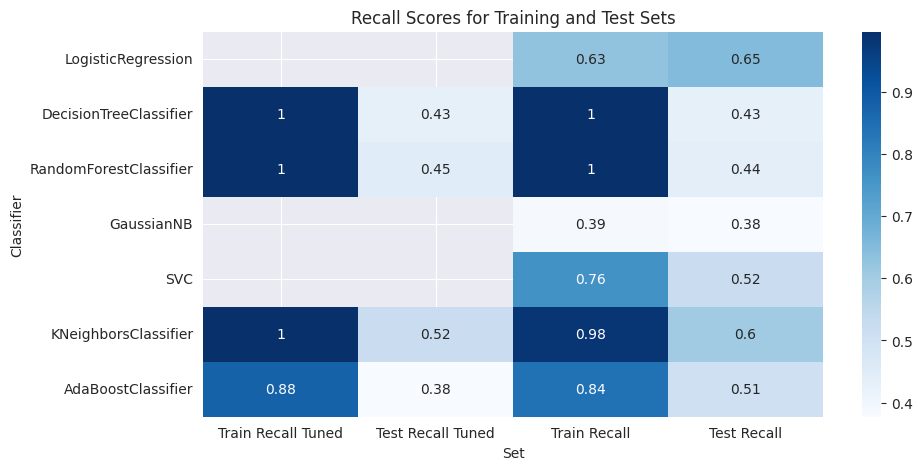

In [23]:
# ### Remaking the selected estimators with the above "best" paramters to optimize for recall in one list

# classifiers_tuned = [
#     DecisionTreeClassifier(criterion='gini', max_depth=100, min_samples_split=2, random_state=312),
#     RandomForestClassifier(n_estimators=1000, max_features='log2', max_depth=300, random_state=312),
#     AdaBoostClassifier(n_estimators=500, learning_rate=1.0, random_state=312),
#     KNeighborsClassifier(n_neighbors=3, weights='distance', random_state=312)]

# ### Evaluating the classifiers using the evaluate_classifiers function

# results_tuned = evaluate_classifiers(classifiers_tuned, X_train_processed, X_test_processed, y_train_processed, y_test_processed)

# ### Comparing the results of the untuned and tuned classifiers in a sns heatmap

# results = pd.concat([results_untuned, results_tuned], axis=1)
# results.columns = ['Train Recall', 'Test Recall', 'Train Recall Tuned', 'Test Recall Tuned']
# results = results[['Train Recall Tuned', 'Test Recall Tuned', 'Train Recall', 'Test Recall']]
# fig, ax = plt.subplots(figsize=(10, 5))
# sns.heatmap(results, annot=True, cmap='Blues', ax=ax)
# ax.set_title('Recall Scores for Training and Test Sets')
# ax.set_xlabel('Set')
# ax.set_ylabel('Classifier')
# plt.show()